## importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
salary = pd.read_csv('Salary_Data.csv')

## Analysis

In [3]:
salary.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
columns=salary.columns
mini = []
for i in columns:
    minimum = salary[i].min()
    mini.append(minimum)
print(mini)

[1.1, 37731.0]


In [5]:

maxi = []
for i in columns:
    maximum = salary[i].max()
    maxi.append(maximum)
print(maxi)

[10.5, 122391.0]


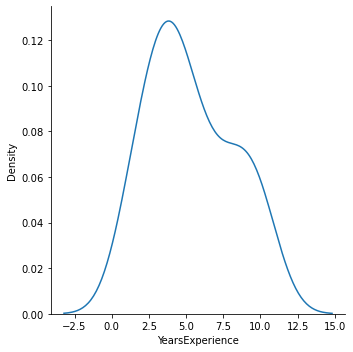

In [10]:
sns.displot(salary['YearsExperience'], kind = 'kde')

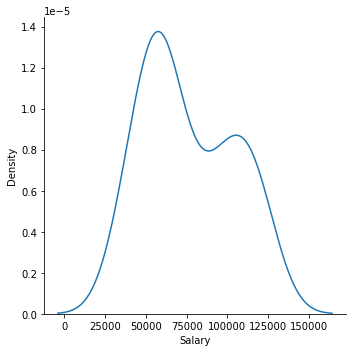

In [11]:
sns.displot(salary['Salary'], kind = 'kde')

In [12]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Building model

In [14]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


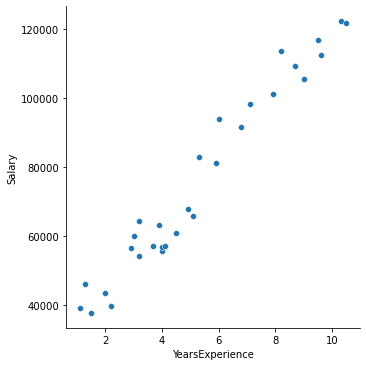

In [16]:
sns.relplot(x = 'YearsExperience', y = 'Salary',data = salary)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

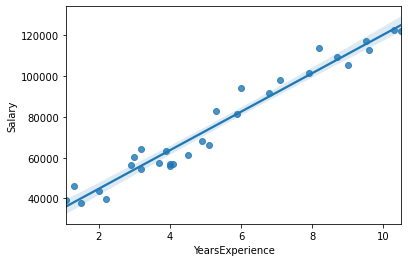

In [17]:
sns.regplot(x = 'YearsExperience', y = 'Salary',data = salary)

In [18]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience', data = salary).fit()

In [20]:
model.params, model.tvalues, model.pvalues, model.rsquared, model.rsquared_adj

(Intercept          25792.200199
 YearsExperience     9449.962321
 dtype: float64,
 Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64,
 0.9569566641435086,
 0.9554194021486339)

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        18:58:06   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
import random
year = []
for i in range(30):
    x = round(random.uniform(1.0, 10.5),1)
    year.append(x)
print(year)

[2.6, 10.2, 7.5, 9.6, 8.3, 7.2, 7.3, 8.5, 8.9, 6.0, 4.6, 10.1, 1.2, 1.2, 6.4, 1.5, 7.6, 5.7, 1.5, 4.7, 7.3, 8.7, 2.8, 2.4, 2.2, 5.8, 1.3, 5.9, 9.6, 2.4]


In [34]:
year

[2.6,
 10.2,
 7.5,
 9.6,
 8.3,
 7.2,
 7.3,
 8.5,
 8.9,
 6.0,
 4.6,
 10.1,
 1.2,
 1.2,
 6.4,
 1.5,
 7.6,
 5.7,
 1.5,
 4.7,
 7.3,
 8.7,
 2.8,
 2.4,
 2.2,
 5.8,
 1.3,
 5.9,
 9.6,
 2.4]

## Prediction

In [53]:
newdata = pd.Series(year, name='years')
data1 = pd.DataFrame(newdata, columns = ['YearsExperience'])
data1

,YearsExperience


In [50]:
pred = pd.Series(model.predict(data1), name = 'salary')

In [51]:
pred

0      50362.102234
1     122181.815878
2      96666.917610
3     116511.838485
4     104226.887467
5      93831.928913
6      94776.925145
7     106116.879931
8     109896.864860
9      82491.974127
10     69262.026877
11    121236.819645
12     37132.154984
13     37132.154984
14     86271.959056
15     39967.143681
16     97611.913842
17     79656.985431
18     39967.143681
19     70207.023110
20     94776.925145
21    108006.872395
22     52252.094699
23     48472.109770
24     46582.117306
25     80601.981663
26     38077.151217
27     81546.977895
28    116511.838485
29     48472.109770
Name: salary, dtype: float64

In [46]:
data1 = pd.DataFrame(newdata, columns = ['YearsExperience'])
data1

,YearsExperience
0,2.6
1,10.2
2,7.5
3,9.6
4,8.3
5,7.2
6,7.3
7,8.5
8,8.9
9,6.0


In [54]:
pd.concat([newdata,pred], axis = 1)

,years,salary
0,2.6,50362.102234
1,10.2,122181.815878
2,7.5,96666.917610
3,9.6,116511.838485
4,8.3,104226.887467
5,7.2,93831.928913
6,7.3,94776.925145
7,8.5,106116.879931
8,8.9,109896.864860
9,6.0,82491.974127
